# Polynomial Regression

This regression model has the following model equation:


\begin{align*}
y &= b_0 + b_1 x^1 + b_2 x^2 + b_3 x^3 + ... + b_n x^n\\
\end{align*}

It has only one predictor $x$, but its model involves several higher order of its predictor. Its plot would be a curve instead of a stright line. The prediction is expected to be more accurate than using linear regression. 


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

The dataset is taken from *Salary* data on various *Levels* and *Positions*. It has 10 records:

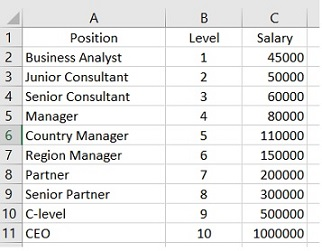

We are interested on the predictor *Level* only, and how it affects the *Salary*

In [2]:
# Read the dataset
dataset = pd.read_csv('Position_Salaries.csv') # size (10,3) with columns "Position", "Level" and "Salary"
X = dataset.iloc[:, 1:2].values  # Take all records but only "Level" and "Salary"
y = dataset.iloc[:, 2].values    # Take the col-2

Create linear regression machine *mylinreg_1* and fit it with the data:

In [3]:
from sklearn.linear_model import LinearRegression
mylinreg_1 = LinearRegression()   # Create the object
mylinreg_1.fit(X, y)              # Fit the object to the dataset. The mylinreg_1 is ready for prediction
                                  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The regressor *mylinreg_1* is now ready for making a linear prediction. Now we want to create a regression machine *mylinreg_2* for polynomial regression.

Remember that our predictor matrix $X$ has only one predictor. In the polynomial equation, there is actually one predictor but with some higher order. So we need to convert this $X$ to a predictor matric for polynomial regression $Xpoly$. It shall have several columns depending on the order we set, representing x, $x^2$, $x^3$, .... , $x^N$, depending on the order $N$ that we set. Also it will have one additional column for holding $b_0$ (remember when we did multilinear regression?), whose values are set to $1$. We will set the order until 3rd order:

In [4]:
mydegree = 3
from sklearn.preprocessing import PolynomialFeatures
mypoly_feat = PolynomialFeatures(degree = mydegree)
Xpoly = mypoly_feat.fit_transform(X)
print("The Xpoly: \n", Xpoly)

The Xpoly: 
 [[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


Please observe the $Xpoly$ that has col-2 and col-3 as order of the col-1. As the input $Xpoly$ ready, let's use it for creating polynomial regressor:

In [5]:
mylinreg_2 = LinearRegression()
mylinreg_2.fit(Xpoly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

As you notice, it still use the Linear Regression, only that the input is now a polynomial predictor matrix $Xpoly$.

Now we have two machines *mylinreg_1* (simple linear regressor) and *mylinreg_2* (polynomial regressor). Let's use these machine for making prediction:

In [6]:
y_pred = mylinreg_1.predict(X)
y_pred_poly = mylinreg_2.predict(Xpoly)

Here is the plot for simple linear regression and polynomial model:

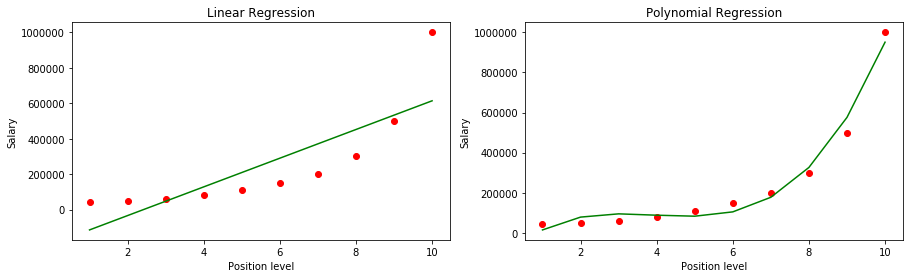

In [7]:
plt.figure(figsize=(23,4))
plt.subplot(131)
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.subplot(132)
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_poly, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Let's combine both plot and make it with a finer granularity to have smoother plot for polynomial:

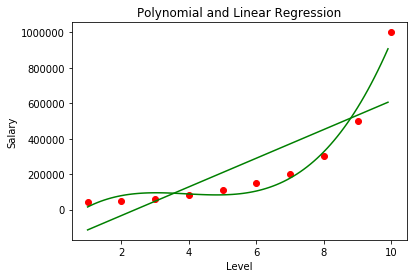

In [8]:
Xgrid = np.arange(min(X), max(X), 0.1)         # shape (90,) 
Xgrid = Xgrid.reshape((len(Xgrid), 1))         # convert from scalar (90,) to matrix (90,1
y_pred = mylinreg_1.predict(Xgrid) 
Xgrid_poly = mypoly_feat.fit_transform(Xgrid)  # Transform X_grid first into polynom matrix
y_pred_poly = mylinreg_2.predict(Xgrid_poly)   # Perform polynomial regression
plt.scatter(X, y, color = 'red')     # Plot for actual y
plt.plot(Xgrid, y_pred, color = 'green') # Plot simple linear model 
plt.plot(Xgrid, y_pred_poly, color = 'green') # Plot polynomial model

plt.title('Polynomial and Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Now we will predict what could be the *Salary* if the Level is 6.5. We will use both regressor, the simple linear and the polynomial:

In [9]:
newlevel = 6.5
print("The predicted Salary for a Level ", newlevel)
# Predicting a new salary with the Linear Regression
pred_salary_linear = mylinreg_1.predict(newlevel)
print("\nUsing Linear Regression: ", pred_salary_linear)
# Predicting a new salary with the Polynomial Regression
pred_salary_polynomial = mylinreg_2.predict(mypoly_feat.fit_transform(6.5))
print("Using Polynomial Regression: ", pred_salary_polynomial)

The predicted Salary for a Level  6.5

Using Linear Regression:  [330378.78787879]
Using Polynomial Regression:  [133259.46969697]


Once again, we plot the predicted *Salary*:

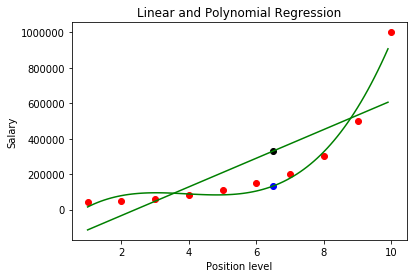

In [10]:
plt.scatter(X, y, color = 'red')     # Plot for actual Salary data
plt.scatter(newlevel, pred_salary_linear, color = 'black') # Predicted Salary (Linear)
plt.scatter(newlevel, pred_salary_polynomial, color = 'blue') # Prdicted Salary (Polynomial)
plt.plot(Xgrid, y_pred, color = 'green') # Plot linear model 
plt.plot(Xgrid, y_pred_poly, color = 'green') # Plot Polynomial model
plt.title('Linear and Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The plot shows us that by using polynomial regression, we could get better and accurate result of the prediction.